In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from scipy.integrate import solve_ivp


In [4]:
df2 = pd.read_csv('https://media.githubusercontent.com/media/LucasAdame/R0/main/20210422sint.csv', sep = ';')
df2.head(n=1)

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_EVOLUCAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,431690,SANTA MARIA,1,SANTA MARIA - R01 R02,Masculino,30 a 39,Clínico,01/03/2021,25/02/2020,NaN,...,NaN,10/03/2020,PARDA,NAO ENCONTRADO,NAO,CAMOBI,NAO,E-SUS,BRASIL,NAO


In [3]:
df2['DATA_SINTOMAS'].dropna()

0         25/02/2020
1         25/02/2020
2         26/02/2020
3         27/02/2020
4         29/02/2020
             ...    
935834    20/04/2021
935835    21/04/2021
935836    21/04/2021
935837    21/04/2021
935838    21/04/2021
Name: DATA_SINTOMAS, Length: 935839, dtype: object

In [4]:
n=0
dia2 = []
dia2.append(df2['DATA_SINTOMAS'][0])
confirmados2 = [0]*421

for i in range (0, 935839):
    if dia2[n] != df2['DATA_SINTOMAS'][i]:
        dia2.append(df2['DATA_SINTOMAS'][i])
        n = n + 1
    confirmados2[n] = confirmados2[n] + 1
    
media2 = [0]*(421-6)
for i in range (0, len(confirmados2)-6):
    for k in range(0, 7):
        media2[i] = media2[i] + confirmados2[i+k]
    media2[i] = media2[i]/7

soma142 = [0]*(421-13)
for i in range (0, len(confirmados2)-13):
    for k in range(0, 14):
        soma142[i] = soma142[i] + confirmados2[i+k]

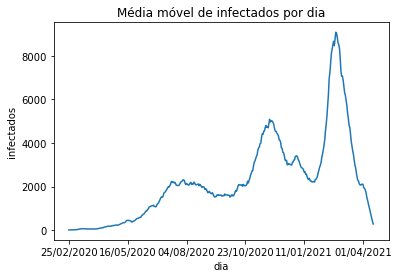

In [11]:
plt.plot(dia2[0:len(dia2)-6], media2, label = 'infectados por dia') #310-400
plt.title('Média móvel de infectados por dia')
plt.xlabel('dia')
plt.xticks(np.arange(0, len(dia2)+1, 80))
plt.ylabel('infectados')
plt.savefig('media_rs.png')
plt.show()

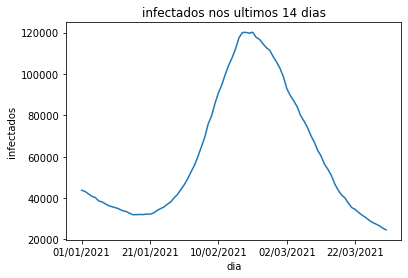

In [6]:
plt.plot(dia2[310:400], soma142[310:400], label = 'infectados por dia')
plt.title('infectados nos ultimos 14 dias')
plt.xlabel('dia')
plt.xticks(np.arange(0, (400-310)+1, 20))
plt.ylabel('infectados')
plt.show()

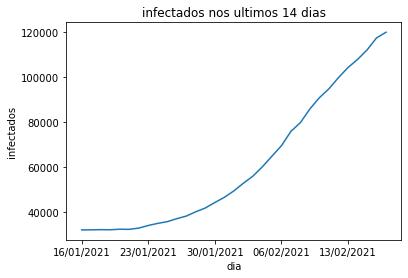

In [7]:
plt.plot(dia2[325:358], soma142[325:358], label = 'infectados por dia')
plt.title('infectados nos ultimos 14 dias')
plt.xlabel('dia')
plt.xticks(np.arange(0, 30+1, 7))
plt.ylabel('infectados')
plt.show()

In [8]:
fity2 = [0]*len(soma142)
np.asarray(soma142)
for i in range(0,len(soma142)):
    fity2[i] = math.log(soma142[i])

[ 0.06601671 10.6197605 ]
R0 = 1.9242339479302588


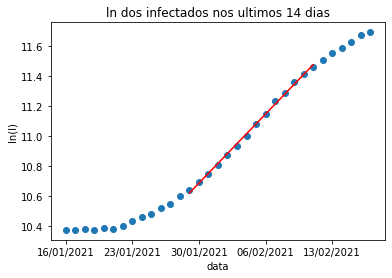

In [12]:
plt.scatter(dia2[325:358], fity2[325:358], label = 'log dos infectados por dia')
plt.title('ln dos infectados nos ultimos 14 dias')
plt.xlabel('data')
plt.xticks(np.arange(0, 34+1, 7))
plt.ylabel('ln(I)')

y = fity2[338:352]
x = np.linspace(0, 352-338, 352-338, endpoint = False)
fit2 = np.polyfit(x,y,1)
#plt.plot(x,np.poly1d(np.polyfit(x,y,1)), color = "red")
print(fit2)
print('R0 =',fit2[0]/(1/14)+1)

plt.plot(x+13,np.poly1d(fit2)(x),color="red")
plt.savefig('resultado_rs.png')
plt.show()